<a href="https://colab.research.google.com/github/Jessica1842553/MCDaa2025/blob/main/T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 4 - Jessica Lizeth Hernández Bracho 1842553
### **Selección de Características**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/student-mat.csv', sep=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [88]:
# Modificando columnas - convertir 'yes'/'no' a 1/0
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})

In [54]:
#Variables de Interés a analizar
x = df[['age',
       'studytime',
       'failures',
       'absences',
       #'health',
       #'famrel',
        'higher',
        #'internet',
       # 'schoolsup',
        #'famsup',
        #'activities',
        #'freetime',
       'G1',
       'G2']]

y = df['G3']

In [55]:
x

,age,studytime,failures,absences,higher,G1,G2
0,18,2,0,6,1,5,6
1,17,2,0,4,1,5,5
2,15,2,3,10,1,7,8
3,15,3,0,2,1,15,14
4,16,2,0,4,1,6,10
...,...,...,...,...,...,...,...
390,20,2,2,11,1,9,9
391,17,1,0,3,1,14,16
392,21,1,3,3,1,10,8
393,18,1,0,0,1,11,12


In [56]:
y

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


## ANOVA de valor $F$

In [57]:
from sklearn.feature_selection import f_regression

In [58]:
valor_f = f_regression(x, y)
valor_f

(array([1.05354697e+01, 3.79682649e+00, 5.86716658e+01, 4.61482578e-01,
        1.35349034e+01, 7.05842247e+02, 1.77570755e+03]),
 array([1.27143855e-003, 5.20611546e-002, 1.46566282e-013, 4.97331796e-001,
        2.66800159e-004, 9.00143031e-090, 7.62571915e-148]))

In [59]:
p_prueba = []
np_prueba = []
alpha = 0.05

for i in range(len(valor_f[1])):
    if valor_f[1][i] < alpha:
        p_prueba.append(x.columns[i])
    else:
        np_prueba.append(x.columns[i])

In [18]:
p_prueba

['age', 'failures', 'higher', 'G1', 'G2']

In [19]:
np_prueba

['studytime',
 'absences',
 'health',
 'famrel',
 'internet',
 'schoolsup',
 'famsup',
 'activities',
 'freetime']

In [60]:
df_resultados = pd.DataFrame(valor_f[0], index = x.columns, columns=['valor_f']).sort_values('valor_f', ascending = False)
df_resultados

,valor_f
G2,1775.707546
G1,705.842247
failures,58.671666
higher,13.534903
age,10.535470
studytime,3.796826
absences,0.461483


In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
escalador = MinMaxScaler()
escala = escalador.fit_transform(x)
x_escalada = pd.DataFrame(escala, columns=x.columns)
x_escalada

,age,studytime,failures,absences,higher,G1,G2
0,0.428571,0.333333,0.000000,0.080000,1.0,0.1250,0.315789
1,0.285714,0.333333,0.000000,0.053333,1.0,0.1250,0.263158
2,0.000000,0.333333,1.000000,0.133333,1.0,0.2500,0.421053
3,0.000000,0.666667,0.000000,0.026667,1.0,0.7500,0.736842
4,0.142857,0.333333,0.000000,0.053333,1.0,0.1875,0.526316
...,...,...,...,...,...,...,...
390,0.714286,0.333333,0.666667,0.146667,1.0,0.3750,0.473684
391,0.285714,0.000000,0.000000,0.040000,1.0,0.6875,0.842105
392,0.857143,0.000000,1.000000,0.040000,1.0,0.4375,0.421053
393,0.428571,0.000000,0.000000,0.000000,1.0,0.5000,0.631579


## Umbral de varianza

In [63]:
from sklearn.feature_selection import VarianceThreshold

In [64]:
selector = VarianceThreshold()
selector.fit_transform(x_escalada)
selector.variances_

array([0.03314618, 0.07806014, 0.06129075, 0.01135776, 0.04806922,
       0.04292641, 0.03909445])

In [65]:
df_resultados['varianza'] = selector.variances_
df_resultados

,valor_f,varianza
G2,1775.707546,0.033146
G1,705.842247,0.078060
failures,58.671666,0.061291
higher,13.534903,0.011358
age,10.535470,0.048069
studytime,3.796826,0.042926
absences,0.461483,0.039094


In [90]:
import matplotlib.pyplot as plt

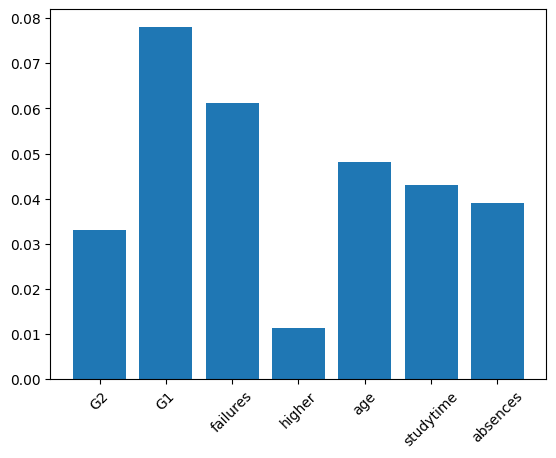

In [91]:
plt.figure()
plt.xticks(rotation=45, fontsize=10)
plt.bar(df_resultados.index, df_resultados.varianza)
plt.show()

### Conclusión
A partir de los analisis realizados sobre las variables de interés, se observa que existen diferencias significativas en el grado de dispersión de los datos para cada característica.

Las variables _G1_, _G2_ (calificaciones de los periodos), _failures_ (número de materias reprodas anteriormente) y _age_ (edad) presentan una combinación adecuada de dispersión y relevancia estadística, lo que las hace útiles para predecir la calificación final (G3).

En cambio, variables como _studytime_ (tiempo de estudio), _absences_ (faltas) y _famrel_ (relación familiar) muestran varianza moderada y baja importancia estadística, por lo que pueden excluirse del modelo sin afectar su desempeño.  
Por último, _higher_ (continuar estudios), con su baja varianza aún puede conservarse por su relación con la motivación académica.


## Información mutua


In [68]:
from sklearn.feature_selection import mutual_info_regression

In [69]:
mir = mutual_info_regression(x, y)
mir

array([0.03820762, 0.01963403, 0.04820667, 0.12895974, 0.        ,
       0.8105025 , 1.39489373])

In [71]:
df_resultados['mir'] = mir
df_resultados

,valor_f,varianza,mir
G2,1775.707546,0.033146,0.038208
G1,705.842247,0.078060,0.019634
failures,58.671666,0.061291,0.048207
higher,13.534903,0.011358,0.128960
age,10.535470,0.048069,0.000000
studytime,3.796826,0.042926,0.810503
absences,0.461483,0.039094,1.394894


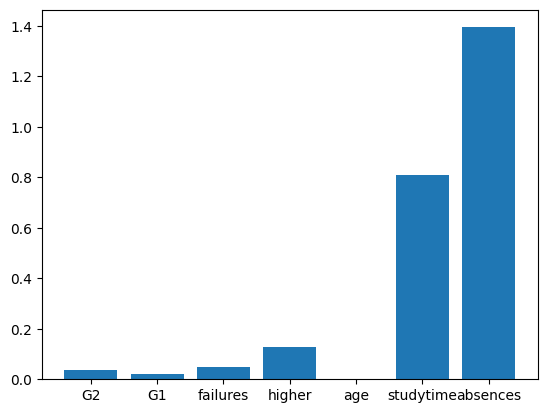

In [73]:
plt.figure()
plt.bar(df_resultados.index, df_resultados.mir)
plt.show()

### Nota:

Las variables _G2_, _G1_ (calif. de periodos) y _failures_ (número de materias reprodas anteriormente) muestran **alta relevancia lineal** (valor F alto) para predecir _G3_ (nota final).

Sin embargo, _higher_, _studytime_ y _absences_ (continuación de estudios, tiempo de estudio y faltas) tienen **baja relevancia lineal pero alta dependencia no lineal**.

## Selección de características exhaustiva (EFS)




In [74]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [75]:
lr = LinearRegression()
lr

LinearRegression()

In [76]:
efs = EFS(estimator = lr,        # Use linear regression as the classifier/estimator
          min_features = 1,      # The minimum number of features to consider is 1
          max_features = 5,      # The maximum number of features to consider is 4
          scoring = 'neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy
          cv = 5)

In [77]:
efs = efs.fit(x, y)

Features: 119/119

In [78]:
efs.best_score_

np.float64(-1.145143677754278)

In [79]:
efs.best_feature_names_

('failures', 'G2')

In [80]:
df_resultados_efs = pd.DataFrame(efs.get_metric_dict()).T
df_resultados_efs = df_resultados_efs.sort_values('avg_score', ascending = False)
df_resultados_efs

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
21,"(2, 6)","[-0.8356157069952931, -1.1821942299728652, -1....",-1.145144,"(failures, G2)",0.22547,0.175423,0.087712
6,"(6,)","[-0.826689217046448, -1.1726931762158497, -1.1...",-1.146407,"(G2,)",0.228292,0.177619,0.08881
42,"(0, 5, 6)","[-0.9281150320787683, -1.034955253570911, -1.2...",-1.14896,"(age, G1, G2)",0.203344,0.158208,0.079104
57,"(2, 4, 6)","[-0.8333754554856807, -1.1917768731467444, -1....",-1.150185,"(failures, higher, G2)",0.231348,0.179997,0.089998
36,"(0, 2, 6)","[-0.83688162308866, -1.135621452048433, -1.202...",-1.150269,"(age, failures, G2)",0.228491,0.177773,0.088887
...,...,...,...,...,...,...,...
9,"(0, 3)","[-2.8735550796411715, -4.213939433044262, -3.1...",-3.481726,"(age, absences)",0.579284,0.450703,0.225351
3,"(3,)","[-3.0666196461742365, -4.233620709204338, -3.2...",-3.483053,"(absences,)",0.527697,0.410566,0.205283
37,"(0, 3, 4)","[-2.935568285984657, -4.159181288970005, -3.25...",-3.494228,"(age, absences, higher)",0.520452,0.404929,0.202465
29,"(0, 1, 3)","[-2.89987427167248, -4.366483163882794, -3.220...",-3.496274,"(age, studytime, absences)",0.628618,0.489086,0.244543


[]

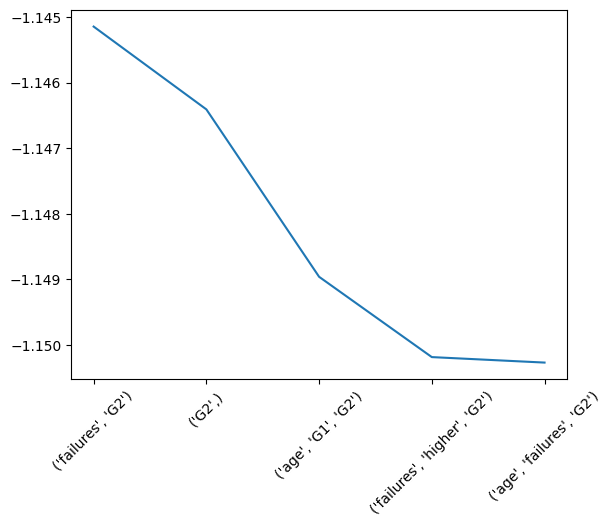

In [81]:
plt.figure()
plt.plot(
    df_resultados_efs.iloc[:5].feature_names.astype(str),
    df_resultados_efs.iloc[:5].avg_score,
        )
plt.xticks(rotation = 45)
plt.plot()

### Conclusión:

El selector exhaustivo identificó que las variables **_failures_** y **_G2_**  son las más relevantes para predecir la nota final (G3).  
Esto coincide con los análisis previos donde estas variables mostraron alta correlación y valor estadístico, confirmando su importancia para el modelo.

## Conclusión general:

A través de distintos métodos de selección de características, se identificaron las variables más relevantes para predecir la calificación final (G3) de los estudiantes. El análisis de **valor F (ANOVA)** mostró que **_G2_, _G1_** y **_failures_** (calificaciones de los periodos y materias reprodas) tienen alta relevancia lineal, mientras que el análisis de varianza respaldó la utilidad de _G1_ y _failures_ por su dispersión informativa.  

Por otro lado, la información mutua reveló que variables como **studytime** y **absences** _(tiempo de estudio y faltas)_, podrían tener una relación no lineal significativa con G3.

Finalmente, el método Exhaustive Feature Selector (EFS) **confirmó** que _G2_ y _failures_ son las variables más predictivas en conjunto, alineándose con los resultados estadísticos previos.  


**Variables Seleccionadas:**
- Variables predictoras:
  - Studytime (tiempo de estudio)
  - Absences (faltas)
  - Failures (materías reprobadas)
  - G1 (calificación primer periodo)
  - G2 (calificación segundo periodo)

- Variable de respuesta:
  - G3 (calificación final)